<a href="https://colab.research.google.com/github/sakinahali/Global_mentalhealth_dataset/blob/main/Analysis_of_Global_Trends_in_Mental_health_Disorder_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of Global Trends in Mental health Disorder using Machine Learning**

### **Introduction**

The prevalence of mental health disorders varies across countries. This variability is particularly concerning as it reflects a multifaceted interplay of cultural, societal, economic, and healthcare factors. Understanding and addressing these differences is crucial for developing effective strategies to support mental health on a global scale. The main aim of this project is to explore the prevalence of mental health disorder in countries using Data Visualization techniques and Machine Learning algorithm. In the context of this project, an essential question to answer is "In which countries are mental health issues most and least prevalent".

### **Table of Contents**

1. [Import Libraries](#import-Libraries)
2. [Data Wrangling/Exploration](#Data-Wrangling/Exploration)
3. [Visualization](#Visualization)
4. [Machine Learning Algorithm](#Machine-learning-algorithm)
5. [Final Visualization/ Conclusion](#Conclusion)

In [148]:
# Install geopy library for finding latitutudes and longitudes
!pip install geopy

In [149]:
# Install geopandas library for geospatial visualization
!pip install geopandas

*italicized text*### **Import Libraries**

In [150]:
#to make dataframe and data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

import json

#to do numerical operations
import numpy as np

#to visualize geospatial data
import geopandas as gpd

# to ploty Plotly graph objects
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#to make multiple Plotly plots in one instance
from plotly.subplots import make_subplots

#to build machine learning algorithm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


print('Libraries imported.')

Libraries imported.


In [151]:
# Import data from drive
from google.colab import drive
drive.mount('/content/drive')

# Read data into csv and display top 5 rows
df = pd.read_csv('/content/drive/MyDrive/Mental health Depression disorder Data.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-151-2154ef3ef4a3>:6: DtypeWarning:

Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.



index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855                   4.83                    1.68   
1             0.099313                   4.83                    1.68   
2             0.096692                   4.83                    1.69   
3             0.094336                   4.83                    1.71   
4             0.092439                   4.83                    1.72   

   Depression (%)  Alcohol use disorders (%)  
0            4.07                       0.67  
1            4.08                       0.67  
2            4.09                       0.67  
3            4.10                       0.67  
4            4.10                       0.67

### **Data Wrangling/ Exploration**

In [152]:
# Get dimension of the dataset
df.shape

(108553, 11)

In [153]:
# Check for missing data
df.isnull().sum()
# Drop all missing values
columns = ['Entity', 'Schizophrenia (%)', 'Bipolar disorder (%)',
                                'Eating disorders (%)', 'Anxiety disorders (%)',
                                'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

df.dropna(subset=columns, inplace=True)

In [154]:
# Change the column type
numeric_columns = ["Year", "Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)",
          "Anxiety disorders (%)", "Drug use disorders (%)", "Depression (%)", "Alcohol use disorders (%)"]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.reset_index(drop=True, inplace=True)

In [155]:
# Check for information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Entity                     6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   int64  
 4   Schizophrenia (%)          6468 non-null   float64
 5   Bipolar disorder (%)       6468 non-null   float64
 6   Eating disorders (%)       6468 non-null   float64
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 556.0+ KB


In [156]:
# Change column from entity to country
column_names = df.columns.values
column_names[1] = "Countries"
df.columns = column_names

In [157]:
# Check for changes
df.head()

index    Countries Code  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990               0.16                  0.70   
1      1  Afghanistan  AFG  1991               0.16                  0.70   
2      2  Afghanistan  AFG  1992               0.16                  0.70   
3      3  Afghanistan  AFG  1993               0.16                  0.70   
4      4  Afghanistan  AFG  1994               0.16                  0.70   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0                  0.10                   4.83                    1.68   
1                  0.10                   4.83                    1.68   
2                  0.10                   4.83                    1.69   
3                  0.09                   4.83                    1.71   
4                  0.09                   4.83                    1.72   

   Depression (%)  Alcohol use disorders (%)  
0            4.07                       0.67  
1            4.08                       0.67  
2            4.09                       0.67  
3            4.10                       0.67  
4            4.10                       0.67

In [158]:
# Make a copy of the dataframe to carry out further analysis
df_copied = df.copy(deep=True)
# This method prevents changes being made to the original dataframe
df_copied.head()

index    Countries Code  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990               0.16                  0.70   
1      1  Afghanistan  AFG  1991               0.16                  0.70   
2      2  Afghanistan  AFG  1992               0.16                  0.70   
3      3  Afghanistan  AFG  1993               0.16                  0.70   
4      4  Afghanistan  AFG  1994               0.16                  0.70   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0                  0.10                   4.83                    1.68   
1                  0.10                   4.83                    1.68   
2                  0.10                   4.83                    1.69   
3                  0.09                   4.83                    1.71   
4                  0.09                   4.83                    1.72   

   Depression (%)  Alcohol use disorders (%)  
0            4.07                       0.67  
1            4.08                       0.67  
2            4.09                       0.67  
3            4.10                       0.67  
4            4.10                       0.67

In [159]:
# Slice dataframe for only relevant attributes
tem_df = df_copied.iloc[:, 1:]
# Drop irrelevant columns
tem_df.drop(labels=['Code', 'Schizophrenia (%)', 'Eating disorders (%)', 'Alcohol use disorders (%)'], axis=1, inplace=True)
# Display top 5 rows
tem_df.head()

Countries  Year  Bipolar disorder (%)  Anxiety disorders (%)  \
0  Afghanistan  1990                  0.70                   4.83   
1  Afghanistan  1991                  0.70                   4.83   
2  Afghanistan  1992                  0.70                   4.83   
3  Afghanistan  1993                  0.70                   4.83   
4  Afghanistan  1994                  0.70                   4.83   

   Drug use disorders (%)  Depression (%)  
0                    1.68            4.07  
1                    1.68            4.08  
2                    1.69            4.09  
3                    1.71            4.10  
4                    1.72            4.10

#### **Exploring Common Mental Health Disorders Across Countries**

In [160]:
# Create a bubble plot using the plotly library
fig = px.scatter(tem_df, x= 'Anxiety disorders (%)', y= 'Bipolar disorder (%)', size= 'Depression (%)',
                 color= 'Countries', hover_name= 'Countries', animation_frame= 'Year',
                 title= 'Exploring Common Mental Health Disorders Across Countries and Year',
                 labels= {'Anxiety disorders(%)': 'Anxiety disorders (%)', ' Bipolar disorder (%)': 'Bipolar disorder (%)'})


# Customize bubble size range
fig.update_traces(marker=dict(sizemode='diameter'))

# Show the plot
fig.show()

The bubble chart shows common mental health disorders in several countries with years. we can see the country with highest mental health disorders across years is New Zealand while the lowest is Vietnam.
Hover on the plot, play the animation frame or Click/Tap on the legend on the Bubble chart to isolate a country and explore further.

In [161]:
# Extract relavant column
ment = ["Countries", "Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)",
                       "Anxiety disorders (%)", "Drug use disorders (%)", "Depression (%)", "Alcohol use disorders (%)"]
ment_df = df[ment]

ranked_countries = pd.DataFrame(columns=["Mental disorder", "Countries", "Prevalence (%)"])

# Sort countries by the decreasing order of prevalence of mental health
for column in ment_df.columns[1:]:
    sorted_countries = ment_df[["Countries", column]].sort_values(by=column, ascending=True).head(10)
    sorted_countries["Mental disorder"] = column
    sorted_countries.rename(columns={column: "Prevalence (%)"}, inplace=True)
    ranked_countries = pd.concat([ranked_countries, sorted_countries], ignore_index=True)

for column in ment_df.columns[1:]:
    bottom_countries = ranked_countries[ranked_countries["Mental disorder"] == column]
    print(f"Bottom 10 Countries with the Lowest Prevalence for {column}:")
    print(bottom_countries[["Countries", "Prevalence (%)"]])
    print()

Bottom 10 Countries with the Lowest Prevalence for Schizophrenia (%):
    Countries  Prevalence (%)
0  Mozambique            0.15
1  Mozambique            0.15
2  Mozambique            0.15
3  Mozambique            0.15
4  Mozambique            0.15
5  Mozambique            0.15
6  Mozambique            0.15
7  Mozambique            0.15
8  Mozambique            0.15
9  Mozambique            0.15

Bottom 10 Countries with the Lowest Prevalence for Bipolar disorder (%):
    Countries  Prevalence (%)
10      China            0.31
11      China            0.31
12  East Asia            0.32
13      China            0.32
14  East Asia            0.32
15      China            0.32
16  East Asia            0.32
17      China            0.32
18  East Asia            0.32
19      China            0.32

Bottom 10 Countries with the Lowest Prevalence for Eating disorders (%):
     Countries  Prevalence (%)
20     Myanmar            0.07
21     Myanmar            0.07
22     Myanmar            0.0

The above code give the bottom 10 countries with the lowest prevalence of each mental health disorder. This could be translated as countries in this category,are either taking the necessary steps to improve mental health challenges or there is no existences of incentives and strategies to record mental health disorder cases hence the low record.







#### **Correlation Between Mental Health Disorders**

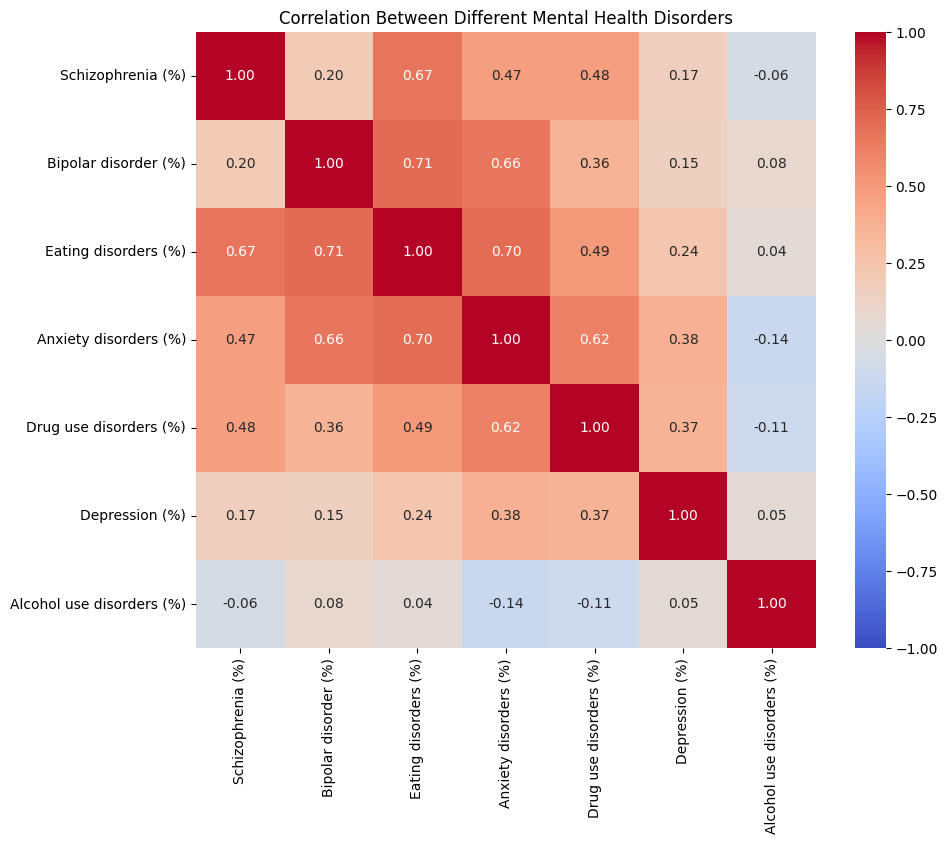

In [162]:
# Extract relevant column
mental_health_columns = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
                         'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                         'Alcohol use disorders (%)']

# Calculate correlation matrix
correlation_matrix = df[mental_health_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Different Mental Health Disorders')
plt.show()

### **Machine Learning Algorithm (Linear Regression)**

Linear Regression is a Supervised Machine Learning Algorithm used for modeling the relationship between a dependent variable (target variable) and one or more independent variables (feature). Here, a multivariate linear regression was used to predict more than one target variables.

Trend in Schizophrenia (%): Increasing
Slope (Coefficient): 0.00021453390816445

Trend in Bipolar disorder (%): Increasing
Slope (Coefficient): 0.00026068263801515013

Trend in Eating disorders (%): Increasing
Slope (Coefficient): 0.0016990406978535063

Trend in Anxiety disorders (%): Increasing
Slope (Coefficient): 0.0018090091082061512

Trend in Drug use disorders (%): Increasing
Slope (Coefficient): 0.0033385055670474375

Trend in Depression (%): Decreasing
Slope (Coefficient): -0.0028762060767183913

Trend in Alcohol use disorders (%): Increasing
Slope (Coefficient): 0.0018334331065759646



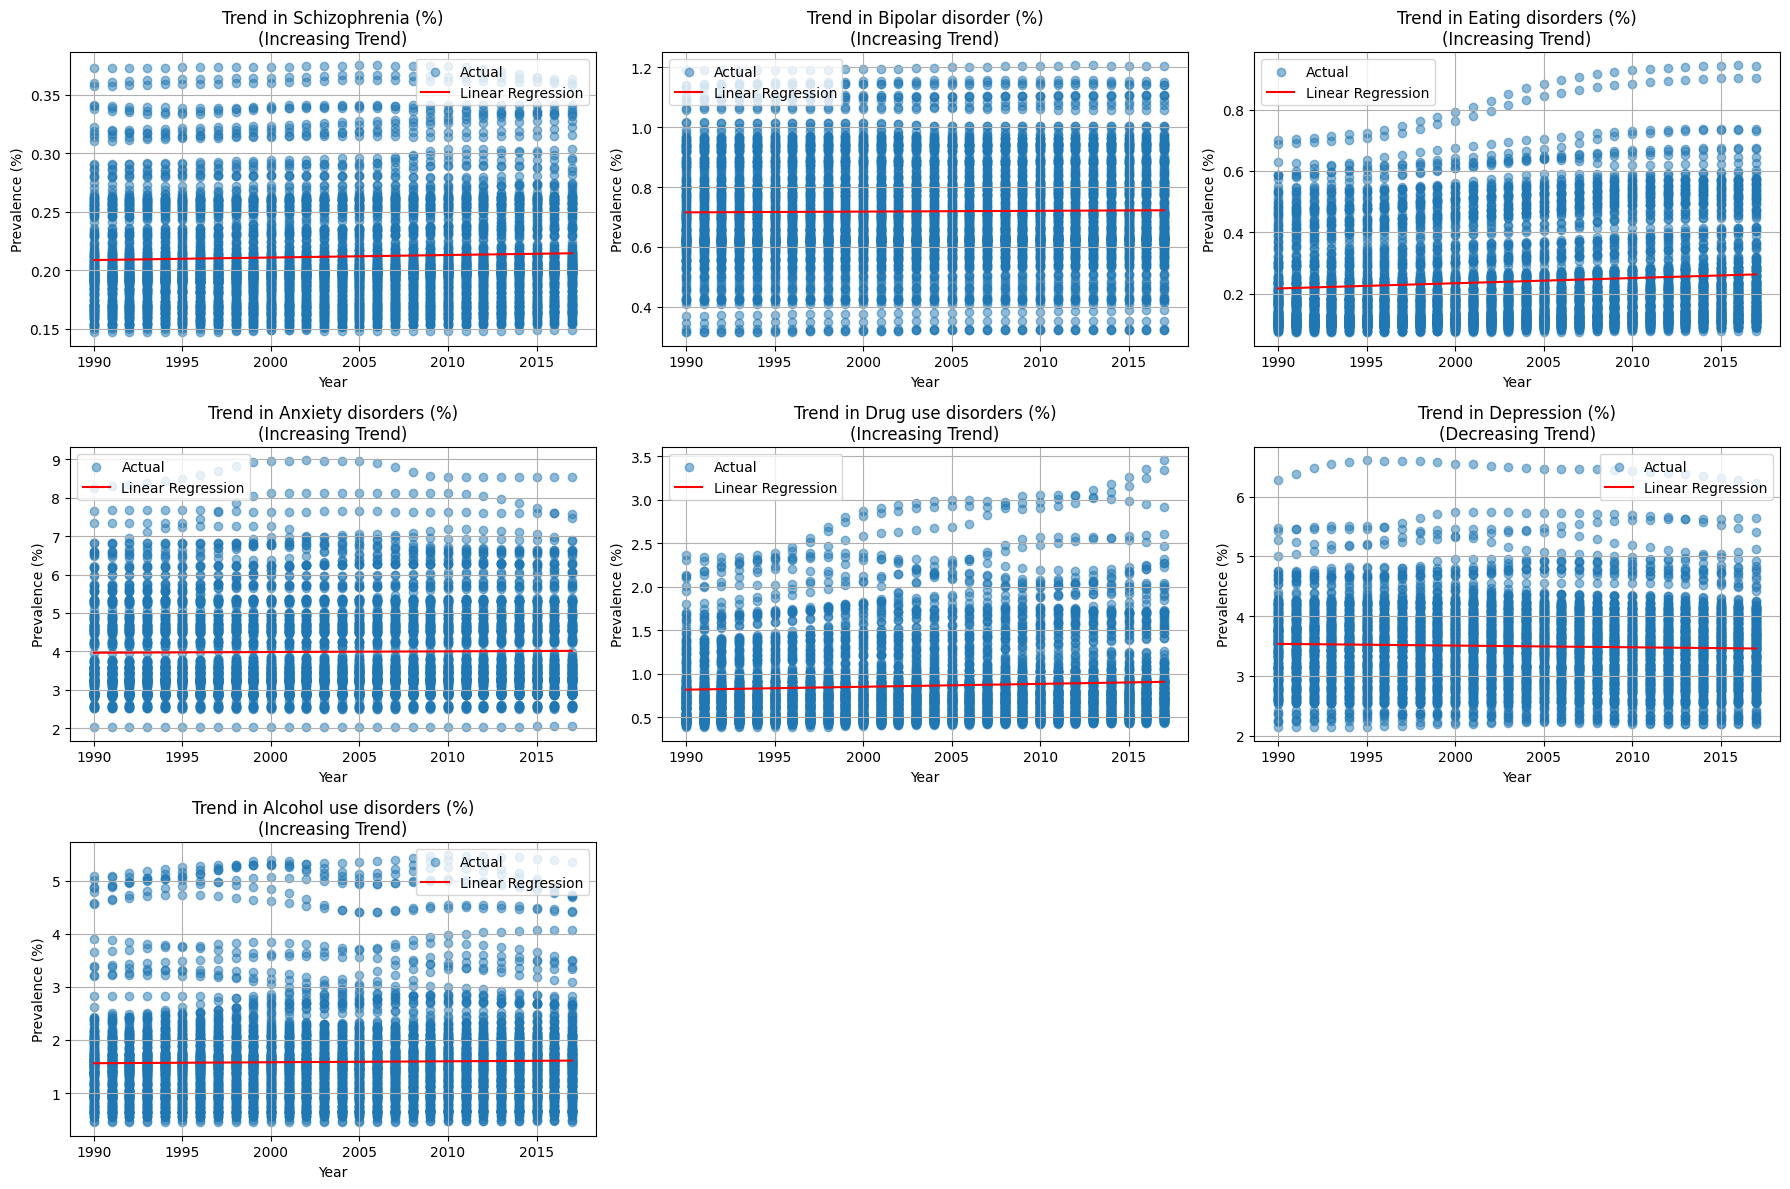

In [163]:
# Extract the feature and target variable
features = ['Year']
target_variables = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
                     'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                     'Alcohol use disorders (%)']

plt.figure(figsize=(18, 12))

for target_variable in target_variables:
    # Create a linear regression model
    model = LinearRegression()

    # Prepare the data for the model
    X = df[['Year']]
    y = df[target_variable]

    # Fit the model
    model.fit(X, y)

    # Get the coefficient
    slope = model.coef_[0]

    # Interpret the slope
    if slope > 0:
        trend = "Increasing"
    elif slope < 0:
        trend = "Decreasing"
    else:
        trend = "No Change"

    # Print the trend information
    print(f"Trend in {target_variable}: {trend}")
    print(f"Slope (Coefficient): {slope}\n")

    # Visualize the linear regression and actual data
    predicted_values = model.predict(X)

    plt.subplot(3, 3, target_variables.index(target_variable) + 1)
    plt.scatter(df['Year'], y, label="Actual", alpha=0.5)
    plt.plot(df['Year'], predicted_values, label="Linear Regression", color="red")
    plt.xlabel("Year")
    plt.ylabel("Prevalence (%)")
    plt.title(f"Trend in {target_variable}\n({trend} Trend)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

The result of the linear regression gives a slope of increasing trends of several mental health disorders across years.

#### **Final Map showing Global Prevalence of Mental Health Disorder**

In [187]:
Map = df
fig = px.choropleth(Map,
                    locations="Code",
                    color="Schizophrenia (%)",
                    scope="world",
                    animation_frame = "Year",
                    title = "Schizophrenia Prevalence Across Countries"
                    )
fig.show()

In [185]:
fig = px.choropleth(Map,
                    locations="Code",
                    color="Anxiety disorders (%)",
                    scope="world",
                    animation_frame = "Year",
                    title = "Anxiety Disorder Prevalence Across Countries"
                    )
fig.show()

In [186]:
fig = px.choropleth(Map,
                    locations="Code",
                    color="Bipolar disorder (%)",
                    scope="world",
                    animation_frame = "Year",
                    title = "Bipolar Disorder Prevalence Across Countries"
                    )
fig.show()

In [191]:
fig = px.choropleth(Map,
                    locations="Code",
                    color="Depression (%)",
                    scope="world",
                    animation_frame = "Year",
                    title = "Depression Prevalence Across Countries"
                    )
fig.show()

#### **Conclusion**

Based on the analysis and visualization, it was inferred that developing African countries, such as Mozambique, exhibited the least prevalence of mental health disorders, while developed countries such as New Zealand showed the highest prevalence. This prompts further questions: Does this observation suggest that developing countries are actively addressing mental health concerns? Or could it be that these symptoms are underreported, leading to lower recorded cases?